##**Business Understanding**


The telecommunication sector is made up of companies that make communication possible on a global scale, whether it is through the phone or the Internet, through airwaves or cables, through wires or wirelessly. These companies created the infrastructure that allows data in words, voice, audio or video to be sent anywhere in the world.
Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer churn analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.
Customer churn happens when customers quit using a company’s service or stop doing business with a company. By doing the prediction on customer churn rate, companies can easily monitor and be alert of churn rate. Thus, they will know what brings to their customer retention success rate and develop strategies to further improve the business.
The customer churn is an important activity in a growing and competitive telecommunication sector and is one of the greatest importance for a project manager. Due to the high cost of acquiring new customers, customer churn prediction has emerged as an indispensable part of telecom’s sectors’ strategic decision making and planning process.


In [ ]:
# Importing libraries
# General
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick   

#Visualisation(EDA)
import plotly.graph_objs as go
import plotly.offline as py
sns.set(style = 'white')
%matplotlib inline

# Train test split
from sklearn.model_selection import train_test_split

# Data prepocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff   #visualization

# Confusion Matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

# K fold
from sklearn.model_selection import KFold 

pd.set_option('mode.chained_assignment', None)

# **Data Understanding**

In this assignment, we are going to use “Telcom_Customer_Churn” which is found in Kaggle to predict the customer churn rate. We are going to select the best modeling technique to predict our target attribute, which is the customer churn. The details of the dataset are described as below:-
Each row of the data will represent each customer, each column of the data represents the customers’ attributes which are described on the metadata of the customer. The dataset represents the details about:-
- Demographic data about customers – gender, whether they are senior citizens, having partners and dependents.
- Types of services signed up by each customer which included phone service, multiple lines, internet service, online security, online backup, device protection, technical support, streaming TV and movies.
- Customers who left within the telcom company which is also the target attributes, called Churn
- Account information of each customer – how long he/she have been a customer of telcom company(tenure), contract , paperless billing, payment method, monthly charges and total charges has been charged since they‘re one of the customers at telcom company.

There are a total of 7043 rows and 21 columns of data in this dataset,which means that this dataset contains 7043 unique customers. Within these 21 columns of key attributes, all attributes can be classified or transformed to categorical variables whereas tenure, monthly charges and total charges are classified as continuous variables and need to be scaled before modelling. Also, we can see that the “Total Charges” is needed to be transformed to numerical values as we found that it is declared as object data type earlier. And, we found that there are 11 of missing data in this dataset. Hence, we choose to remove the entire row of data whenever it finds a missing value. It is because removing an entire row of data with missing values will result in a more robust and accurate model and it only consists of 11 rows of data with missing values, thus it will not create a great loss on information of data. Furthermore, we have chosen to replace ‘no internet service’ and ‘no phone service’ in several columns to ‘no’ to ease data classification and ease our modelling section. All values in the attributes also have been changed to lowercase letters to ease the coding part.


In [ ]:
# Reading datasets
data = pd.read_csv('telcom_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check the data types of all the columns
print("Data Types: \n",data.dtypes)

Data Types: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
# Change data types to numeric value
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [ ]:
# Display details of dataset
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  \n", data.isnull().sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :  
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner           

In [ ]:
# Remove the missing values
data.dropna(inplace=True)
print ("\nMissing values :  \n", data.isnull().sum())


Missing values :  
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Remove customerID variable 
data = data.drop('customerID', axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Print all unique values for each columns
for item in data.columns:
    print(item)
    print (data[item].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   

In [ ]:
# Convert all columns value to lowercase
for item in data.columns:
    try:
        data[item] = data[item].str.lower()
    except:
        print(item, "couldn't convert")
data.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert
TotalCharges couldn't convert


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [ ]:
# Convert "no internet service" and "no phone service" into "no"
cols_replace_1 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in cols_replace_1 : 
    data[i]  = data[i].replace({'no internet service' : 'no'})

cols_replace_2 = ['MultipleLines']
for i in cols_replace_2 : 
    data[i]  = data[i].replace({'no phone service' : 'no'})

cols_replace_3 = ['SeniorCitizen']
for i in cols_replace_3:
  data[i].replace(to_replace = 0, value = 'no', inplace = True)
  data[i].replace(to_replace = 1 , value = 'yes', inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,no,yes,no,1,no,no,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,no,no,no,45,no,no,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


# **Exploratory Data Analysis(EDA)**

Exploratory Data Analysis has been carried out to study the relationship between each attribute and customer churn rate. The pie charts below shows the pie plot for customer attrition based on different categories in different columns.


In [ ]:
# Split the dataset into 80% train data and 20% test data
train_data, test_data =  train_test_split(data, test_size=0.2, random_state=100)
train_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1010,male,no,no,no,3,yes,no,dsl,yes,no,no,no,no,no,month-to-month,yes,mailed check,50.15,160.85,no
2732,female,no,no,yes,4,yes,no,no,no,no,no,no,no,no,month-to-month,no,credit card (automatic),20.40,94.50,no
2940,male,yes,no,no,53,no,no,dsl,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,54.45,2854.55,yes
859,male,no,yes,yes,72,no,no,dsl,yes,yes,yes,yes,yes,yes,two year,yes,credit card (automatic),64.80,4719.75,no
2895,female,no,yes,no,37,yes,no,no,no,no,no,no,no,no,one year,yes,bank transfer (automatic),19.85,717.50,no


In [ ]:
# Separating churn and non churn customers
cust_churn = train_data[train_data["Churn"] == "yes"]
cust_not_churn = train_data[train_data["Churn"] == "no"]

# Separating catagorical and numerical columns to do EDA
target_col = ["Churn"]
cat_cols   = train_data.nunique()[train_data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in train_data.columns if x not in cat_cols + target_col]

In [ ]:
# Function for pie plot on data variables with customer churn
def plot_pie(column) :
    #Churn customers
    trace1 = go.Pie(values  = cust_churn[column].value_counts().values.tolist(),
                    labels  = cust_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.20]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    #Non churn customers
    trace2 = go.Pie(values  = cust_not_churn[column].value_counts().values.tolist(),
                    labels  = cust_not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non Churn Customers" 
                   )

    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .05, y = .5),
                                           dict(text = "Non Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .83,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


# To run plot pie functions for all categorical columns
for i in cat_cols :
    plot_pie(i)


In [ ]:
# Function for histogram on data variables with customer churn
def histogram(column) :
    trace1 = go.Histogram(x  = cust_churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = cust_not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

# To run histogram functions for all numerical columns  
for i in num_cols :
    histogram(i)

**Gender** 
- This chart below shows the gender distribution in the customer attrition. It is shown that the percentage of female is more than male for churn customers but the percentage of male is slightly more than female for non churn customers. 

**Senior Citizen**
- This chart is used to see the distribution of senior citizens in churn customer and non churn customer. Based on both pie charts, we can see that there is not much difference in the distribution of senior citizens between churn customers and non-churn customers. The percentage of senior citizens is less in both pie charts.

**Partner**
- The pie chart below shows the partner distribution in customer attrition. From here, we can see that the percentage of churn customers with no partner is more whereas the percentage of non churn customers with no partner is slightly lesser.

**Dependents**
- This pie chart shows the dependents distribution in customer attrition. The percentage of dependents in both churn and non churn customers is more compared to no dependents. Thus, the relationship between the attributes and customer churn rate is not strong.

**Tenure**
- By looking at the histogram below, we can see that a lot of churn customers have been with the telecom company for only less than a month. This could be potentially because different customers have different contracts. Thus by looking at the contract they are into, it could be easier for the customers to decide whether to stay or leave the company. The longer they are attached to the company, the lower the risk of customer churn to take place.

**Phone Service**
- Below shows the phone service distribution in customer attrition.  Most of the customers in telecom have phone service. However, it seems no difference for the customer churn and customer non-churn. Thus, it can be concluded that there are no large impacts for phone service on customer churn.

**Multiple Lines**
- Among those customers with phone service, 44.7% of churn customers and 40.7% of non churn customers have multiple lines.

**Internet Service**
- The most popular internet service provider used by churn customers is fibre optic (69.7%)  and then followed by dsl (24.4%)  whereas 5.9% does not have internet service. This is interesting because even though fibre optic internet services are faster, customer churn are also most likely to happen because of it.

**Online Security**
- Most of the customers do not have online security. Thus, it does not strongly affect the customer churn.

**Online Backup**
- The ratio of customers with online backup is almost similar between churn customers and non churn customers. For both categories, the percentage of customers without online backup are higher compared to customers with online backup. 

**Online Backup**
- The ratio of customers with online backup is almost similar between churn customers and non churn customers. For both categories, the percentage of customers without online backup are higher compared to customers with online backup. 

**Tech Support**
- In both charts, customers without technical support are more than customers with technical support. Thus, it is less likely for this data to affect the customer churn.

**Streaming TV**
- Similarly, customers with or without a streaming tv is less likely to affect the customer churn. This is because the ratio of customers with streaming is more or less the same between churn and non churn customers.

**Streaming movies**
- 43.6% of churn customers stream movies while 56.4% of churn customers do not stream movies. Thus, there is no strong relationship between streaming movies and customer churn.

**Contract**
- From the pie chart, we can see that most of the churn customers are having month to month contracts followed by one year contracts. Churn customers with two years contracts are the least among all. Thus, we can conclude that when the contract period is short, the chances of customer churn to occur will be higher.

**Paperless Billing**
- The use of paperless billing in churn customers is slightly higher compared to non churn customers.

**Payment Method**
- Based on the payment method distribution, electronic check payment occupied 56.7% of the churn customer. Thus, it can be said that electronic check payment will have a huge impact in customer attrition.

**Monthly Charges**
- From the histogram, the monthly charges for most of the non churn customers in Telecom is around 20, which is the lowest charge. This could potentially mean that the lower the charges is, the easier it is to retain the customers.

**Total Charges**
- Based on the histogram below, it can be seen that the churn is higher when the total charges are lower. 


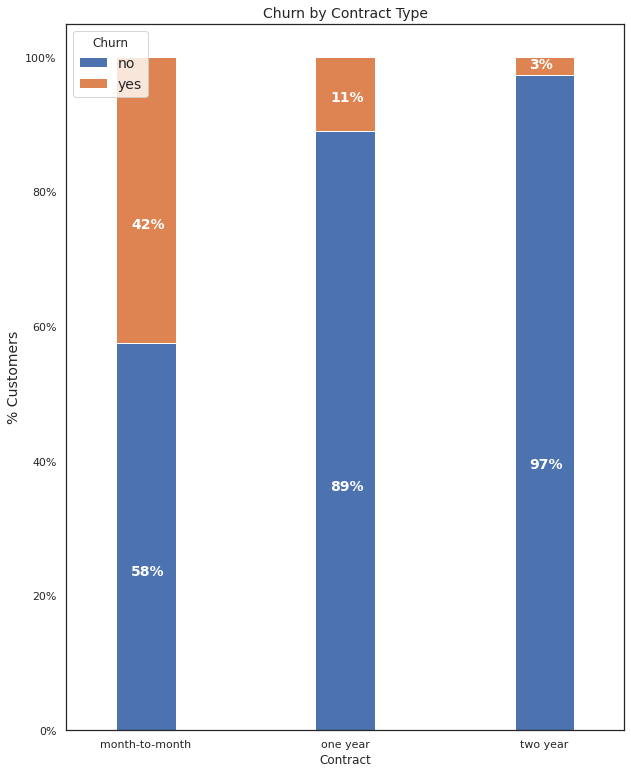

In [ ]:
# Additional EDA for contract type with churn rate
contract_churn = train_data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,13),
                                                                )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '# of Customers by their tenure')

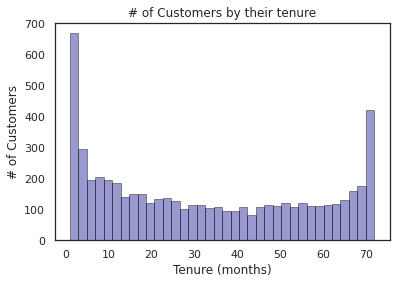

In [ ]:
ax = sns.distplot(train_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

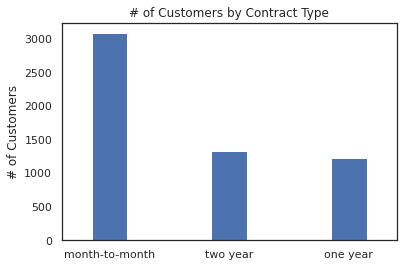

In [ ]:
ax = train_data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

# **Balance the number of churners and non-churners**


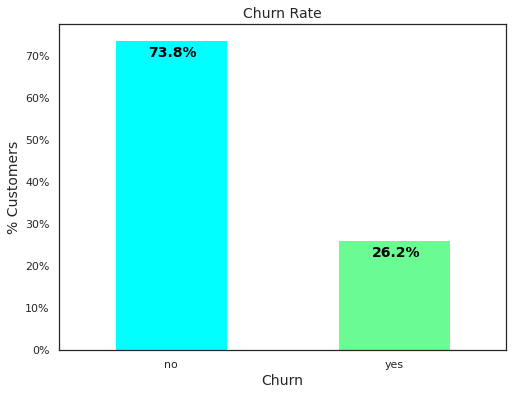

In [ ]:
# Showing original ratio for both churn and non-churn customer
colors = ['#00FFFF','#6AFB92']
ax = (train_data['Churn'].value_counts()*100.0 /len(train_data)).plot(kind='bar',stacked = True,
                                                         rot = 0, color = colors,
                                                        figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
           str(round((i.get_height()/total), 1))+'%',
           fontsize=12,
           color='black',
           weight = 'bold',
           size = 14)

In [ ]:
# Balance the number of the churners and non-churners
churners_number = len(train_data[train_data['Churn'] == 'yes'])
print("Number of churners: ", churners_number)

churners = (train_data[train_data['Churn'] == 'yes'])

non_churners = train_data[train_data['Churn'] == 'no'].sample(n=churners_number)
print("Number of non-churners: ", len(non_churners))
balance_train_data = churners.append(non_churners)

Number of churners:  1475
Number of non-churners:  1475


In [ ]:
# Split X_train set, X_test set and y_train set,y_test set
X_train = balance_train_data.drop('Churn',axis=1)
X_test = test_data.drop('Churn',axis=1)
y_train = balance_train_data['Churn']
y_test = test_data['Churn']
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
942,male,no,no,no,24,yes,no,fiber optic,no,no,no,no,no,yes,month-to-month,yes,credit card (automatic),79.85,2001.00
3730,female,no,yes,no,57,yes,yes,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit card (automatic),104.50,5921.35
1761,male,no,no,no,58,yes,yes,no,no,no,no,no,no,no,two year,yes,credit card (automatic),24.45,1513.60
2283,male,no,no,no,1,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check,71.55,71.55
1872,female,no,yes,yes,41,yes,no,no,no,no,no,no,no,no,two year,no,bank transfer (automatic),19.70,804.25


# **Data Preparation**

After doing the EDA, we think that tenure, contract, InternetService, PaymentMethod and MonthlyCharges from our datasets are important in predicting the churn rate. This is because these five features are having a stronger association with the churn rate. Hence, we plan to construct one modelling with all features in our dataset excluding the customer ID and another one with only the five key features to determine which of them is more suitable to predict our customer churn.


# **Data Preprocessing**

In [ ]:
# Categorical columns
encode_cat_cols   = X_train.nunique()[X_train.nunique() < 6].keys().tolist()

# Label encoding categorical columns
le = LabelEncoder()
for i in encode_cat_cols :
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
  
#Standard scaling the numerical columns
scaler = StandardScaler()

col_names_1 = ['MonthlyCharges']
features_train_1 = X_train[col_names_1] 
features_test_1 = X_test[col_names_1]

X_train['MonthlyCharges'] = scaler.fit_transform(features_train_1)
X_test['MonthlyCharges'] = scaler.transform(features_test_1)

col_names_2 = ['tenure']
features_train_2 = X_train[col_names_2] 
features_test_2 = X_test[col_names_2]

X_train['tenure'] = scaler.fit_transform(features_train_2)
X_test['tenure'] = scaler.transform(features_test_2)

col_names_3 = ['TotalCharges']
features_train_3 = X_train[col_names_3] 
features_test_3 = X_test[col_names_3]

X_train['TotalCharges'] = scaler.fit_transform(features_train_3)
X_test['TotalCharges'] = scaler.transform(features_test_3)

# Label Encoding y_train and y_test
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2940,1,1,0,0,1.054206,0,0,0,0,1,1,0,1,1,0,1,2,-0.476495,0.378167
6515,0,0,0,0,0.053820,0,0,0,0,0,0,0,0,0,0,1,1,-1.509641,-0.610121
5383,1,0,0,0,0.345599,1,1,1,0,0,0,0,0,1,0,1,2,0.590092,0.468427
3987,0,0,0,0,-0.696469,1,1,1,0,0,0,0,0,0,0,1,2,0.299685,-0.552394
6549,0,0,0,0,-1.113296,1,0,0,0,0,0,0,0,1,0,1,2,-0.413133,-0.913110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,0,0,1,1,-0.071228,1,0,2,0,0,0,0,0,0,0,1,1,-1.680366,-0.711133
5907,1,0,0,0,-1.113296,1,0,0,0,0,0,0,0,0,0,1,3,-0.833784,-0.918624
6604,1,0,1,1,-1.071613,1,0,0,0,0,0,0,0,0,0,1,2,-0.826744,-0.897513
5707,0,0,0,0,-1.071613,1,0,0,0,0,0,0,0,0,0,0,2,-0.789783,-0.900120


# **Modelling**

# **Using All features**

# **KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print(accuracy_score(y_test,y_predict))
confusion_matrix(y_test, y_predict)

0.6979388770433547


array([[671, 342],
       [ 83, 311]])

# **Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)
print(accuracy_score(y_predict, y_test))

confusion_matrix(y_test, y_predict)

0.728500355366027


array([[725, 288],
       [ 94, 300]])

# **Support Vector Machine (SVM)**


In [ ]:
#SVM
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

y_predict = svc.predict(X_test)
print(accuracy_score(y_test, y_predict))
confusion_matrix(y_test, y_predict)

0.7178393745557925


array([[706, 307],
       [ 90, 304]])

# **Random Forest Classifier**

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

print (accuracy_score(y_test, y_predict))

0.7377398720682303


# **Gaussian Naive Bayes**

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)

# Evaluation
print(accuracy_score(y_test, y_predict))

0.7149964463397299


# **Modelling**

# **Using Five Features**

In [ ]:
X_train_used = X_train[['Contract', 'tenure', 'InternetService', 'PaymentMethod', 'MonthlyCharges']]
X_test_used = X_test[['Contract', 'tenure', 'InternetService', 'PaymentMethod', 'MonthlyCharges']]

# **KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_used, y_train)

y_predict = knn.predict(X_test_used)
print(accuracy_score(y_test,y_predict))
confusion_matrix(y_test, y_predict)

0.7149964463397299


array([[706, 307],
       [ 94, 300]])

# **Determine best parameters for KNN**

In [ ]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)


grid_search = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train_used,y_train)
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 24, 'weights': 'uniform'}


# **Tuning parameters for KNN**

In [ ]:
# #***********
knn = KNeighborsClassifier(n_neighbors=best_params["n_neighbors"], 
                           weights=best_params["weights"])
knn.fit(X_train_used, y_train)

y_predict = knn.predict(X_test_used)

# Evaluation
print(accuracy_score(y_test,y_predict))
confusion_matrix(y_test, y_predict)

0.7327647476901208


array([[727, 286],
       [ 90, 304]])

# **Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_used, y_train)

y_predict = lr.predict(X_test_used)
print(accuracy_score(y_predict, y_test))

confusion_matrix(y_test, y_predict)

0.7078891257995735


array([[692, 321],
       [ 90, 304]])

# **Determine best parameters for Logistic Regression**




In [ ]:
parameters = {'C': np.logspace(0, 4, 10), 'penalty':['l1','l2'] }

grid_search = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_used, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 1.0, 'penalty': 'l2'}


# **Tuning parameters for Logistic Regression**

In [ ]:
lr = LogisticRegression(C=best_params["C"],
                        penalty=best_params["penalty"])
lr.fit(X_train_used, y_train)

y_predict = lr.predict(X_test_used)

# Evaluation
print(accuracy_score(y_predict, y_test))
confusion_matrix(y_test, y_predict)

0.7078891257995735


array([[692, 321],
       [ 90, 304]])

# **Support Vector Machine (SVM)**


In [ ]:
#SVM
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train_used, y_train)

y_predict = svc.predict(X_test_used)
print(accuracy_score(y_test, y_predict))
confusion_matrix(y_test, y_predict)

0.7135749822316987


array([[700, 313],
       [ 90, 304]])

# **Determine best parameters for SVM**

In [ ]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf'], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_used, y_train)
best_params = grid_search.best_params_
print(best_params)

# **Tuning parameters for SVM**

In [ ]:
# SVM
svc = SVC(C=best_params["C"], 
          gamma=best_params["gamma"], 
          kernel=best_params["kernel"],
          probability = True)
svc.fit(X_train_used, y_train)
y_predict = svc.predict(X_test_used)

# Evaluation
print(accuracy_score(y_test, y_predict))
confusion_matrix(y_test, y_predict)

# **Random Forest Classifier**

In [ ]:
# Before tuning parameters
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_used, y_train)
y_predict = rf.predict(X_test_used)

print (accuracy_score(y_test, y_predict))

# **Determine best parameters for Random Forest**

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'log2'],
    'max_leaf_nodes': [10, 20, 30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
        
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train_used, y_train)
best_params = grid_search.best_params_
print(best_params)

# **Tuning parameters for Random Forest**

In [ ]:
# After tuning parameter
rf = RandomForestClassifier(max_depth=best_params["max_depth"], 
                                  max_features=best_params["max_features"],
                                  max_leaf_nodes=best_params["max_leaf_nodes"],
                                  min_samples_leaf=best_params["min_samples_leaf"], 
                                  min_samples_split=best_params["min_samples_split"], 
                                  n_estimators=best_params["n_estimators"])

rf.fit(X_train_used, y_train)
y_predict = rf.predict(X_test_used)

print (accuracy_score(y_test, y_predict))


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)

# Calculate the Accuracy
print(accuracy_score(y_test, y_predict))


# **Gaussian Naive Bayes**

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_used, y_train)
y_predict = gnb.predict(X_test_used)

# Evaluation
print(accuracy_score(y_test, y_predict))

After the modelling processes, we found out that the accuracy score of the model that uses only five key features is slightly lower than using all features. Since we can obtain an almost similar result from both of the modelling, we decided to use only the five features to predict our customer churn as more features will cause a longer training time. 

# **Evaluation**

# **Confusion Matrix**

In [ ]:
def telecom_churn_prediction_alg(X_train_used,X_test_used,y_train,y_test): 

  model.fit(X_train_used,y_train)
  predictions  = model.predict(X_test_used)
  accuracy     = accuracy_score(y_test,predictions)

#confusion matrix
#conf_matrix = confusion_matrix(y_test,predictions)

lst = [lr,knn,rf,gnb,svc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','KNN Classifier',
          'Random Forest Classifier',"Naive Bayes",'SVM Classifier Linear']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test_used)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

In the business world, we think that we should avoid the Type II error which is the False Negative (FP). In our case, false negative means that we predicted not churn, but it actually is a churn. We should avoid this kind of error. This is because if we assume a particular customer will not churn, then we will not take any action to retain that customer. However, they eventually change their service provider, this will lead to a higher churn rate as proper action is not taken on time. 
The result above shows the confusion matrix of the five modelling algorithms. Based on the confusion matrix, we can see that the Random Forest algorithm has the lowest FN and Naive Bayes has the highest FN.


# **Receiver Operating Characteristic (ROC)**

In [ ]:
lst = [lr,knn,rf,gnb,svc]

length = len(lst)

mods   = ['Logistic Regression','KNN Classifier',
          'Random Forest Classifier',"Naive Bayes",'SVM Classifier Linear']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    predictions   = i.predict(X_test_used)
    probabilities = i.predict_proba(X_test_used)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

When AUC is between 0.5 and 1, there is a higher possibility that the model will be able to differentiate the churn and not churn customers. This is because the model can detect a higher number of true positive and true negative rather than false negative and false positive. By referring to the five ROC curves above, we can clearly see that the AUC of the five models have reached a value between 0.5 and 1 and all of the value are almost the same. KNN model has the highest AUC value followed by the Random Forest and SVM model with the same AUC value.

# **Modal Comparison**

In [ ]:
#gives model report in dataframe
def model_report(model,x_train_used,X_test_used,y_train,y_test,name) :
    model.fit(x_train_used,y_train)
    predictions  = model.predict(X_test_used)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df

#outputs for every model
model1 = model_report(lr,X_train_used,X_test_used,y_train,y_test, "Logistic Regression")

model2 = model_report(knn,X_train_used,X_test_used,y_train,y_test,"KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model3 = model_report(rf,X_train_used,X_test_used,y_train,y_test,"Random Forest Classifier")
model4 = model_report(gnb,X_train_used,X_test_used,y_train,y_test,"Naive Bayes")
model5 = model_report(svc,X_train_used,X_test_used,y_train,y_test,"SVM Classifier ")
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

The table above shows the accuracy score, recall score, precision, F1 score and Area under the curve of all the five modelling techniques. From the table, we can conclude that Random Forest model has the highest accuracy score and its overall performance is better. 

# **Deployment**

Among the five modelling techniques that we have constructed, we decided to choose the Random Forest model to predict our customer churn because its overall performance is considered the best one compared to other model in terms of the accuaracy score, precision, recall score and ROC. Besides, this model produce the least number of False Negative (FN) which means it have lesser Type II error compared to other model. 
Choosing an appropriate modelling is very important to predict customer churn rate. This will help us to know more about whether the customer will be churn or not in the future by fitting them into our modelling. By knowing which of the customer will be churn after predicting using a suitable modelling technique, telecom companies are able to take immediate actions such as customizing them different promotional activities to gain back their retention and prevent them from churning.

# **K fold cross validaiton**

In [ ]:
X = X_train_used.append(X_test_used)
y = np.concatenate((y_train,y_test))

# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train_used, X_test_used = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = rf.fit(X_train_used, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test_used), normalize=True)*100)

# Print the accuracy    
print(accuracy_model)

In [ ]:
# Visualize accuracy for each iteration
 
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.title('K Fold cross validation', fontsize=10)

plt.show()
sns.set()

We use the K-fold cross validation to check whether the selected model has the overfit problem or not. We need to make sure that the model will provide us a consistent result when predicting different sets of data. When the model provides us an accurate result during our modelling process but provides a bad result when using another set of data to do the modelling, this means that this model is imperfect because overfitting may occur as the model only fits a certain dataset.

From the bar chart above, we can clearly see that the accuracy score of the five iterations are in the acceptable range. So, we can conclude that Random Forest model do not have overfit problem.